Install Biopython using conda. Import the needed functions from Biopython

In [1]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

fasta file obtained from "R" is read as a list

In [2]:
list_fasta = list(SeqIO.parse("df1.fasta", "fasta"))

Sequences aligned using MUSCLE online tool. AlignIO function from Biopython is used to read file "bugstuff.aln"

In [3]:
with open("bugstuff.aln", "r") as aln:
    alignment = AlignIO.read(aln, "clustal")

In [4]:
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


Use "identity" model to calculate distance for tree construction

In [5]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

Generate the distance matrix

In [6]:
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

KROK088-19	0
KROK061-19	0.18410041841004188	0
KROK141-20	0.1827057182705718	0.004184100418409997	0
KROK064-19	0.18967921896792195	0.18967921896792195	0.18828451882845187	0
KROK140-20	0.1868898186889819	0.1910739191073919	0.18967921896792195	0.002789400278940035	0
KROK138-20	0.18828451882845187	0.1910739191073919	0.18967921896792195	0.001394700139469962	0.001394700139469962	0
KROK139-20	0.18828451882845187	0.1910739191073919	0.18967921896792195	0.001394700139469962	0.001394700139469962	0.0	0
KROK152-20	0.18828451882845187	0.1910739191073919	0.18967921896792195	0.001394700139469962	0.001394700139469962	0.0	0.0	0
KROK059-19	0.22175732217573219	0.22873082287308233	0.22873082287308233	0.22175732217573219	0.22175732217573219	0.22175732217573219	0.22175732217573219	0.22175732217573219	0
KROK135-20	0.20502092050209209	0.21199442119944212	0.21199442119944212	0.20502092050209209	0.20502092050209209	0.20502092050209209	0.20502092050209209	0.20502092050209209	0.01673640167364021	0
KROK065-19	0.191

Construct tree using "" module in tree construction package

In [7]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

Use the object created to build the tree

In [8]:
bug_tree = constructor.build_tree(alignment)
bug_tree.rooted = True
print(bug_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner122')
        Clade(branch_length=0.0005457698883205679, name='Inner121')
            Clade(branch_length=0.004631931479173398, name='Inner117')
                Clade(branch_length=0.025079888335387133, name='Inner94')
                    Clade(branch_length=0.025488637108620052, name='Inner88')
                        Clade(branch_length=0.011283357448847744, name='Inner86')
                            Clade(branch_length=0.10043540901961427, name='KROK014-19')
                            Clade(branch_length=0.009277369920413628, name='Inner85')
                                Clade(branch_length=0.002697963472383255, name='Inner84')
                                    Clade(branch_length=0.07071878660843402, name='KROK010-19')
                                    Clade(branch_length=0.0021924320108128587, name='Inner83')
                                        Clade(branch_length=0.007150760155841415, name='Inner78')
            

Write file in "XML" format

In [9]:
Phylo.write(bug_tree, "bug_tree.xml", "phyloxml")

1

Need to import and work in "matplotlib" to draw the tree

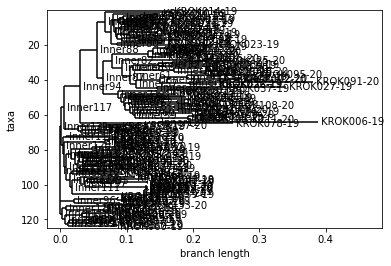

In [10]:
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(bug_tree)

Need to reduce overlap of branches

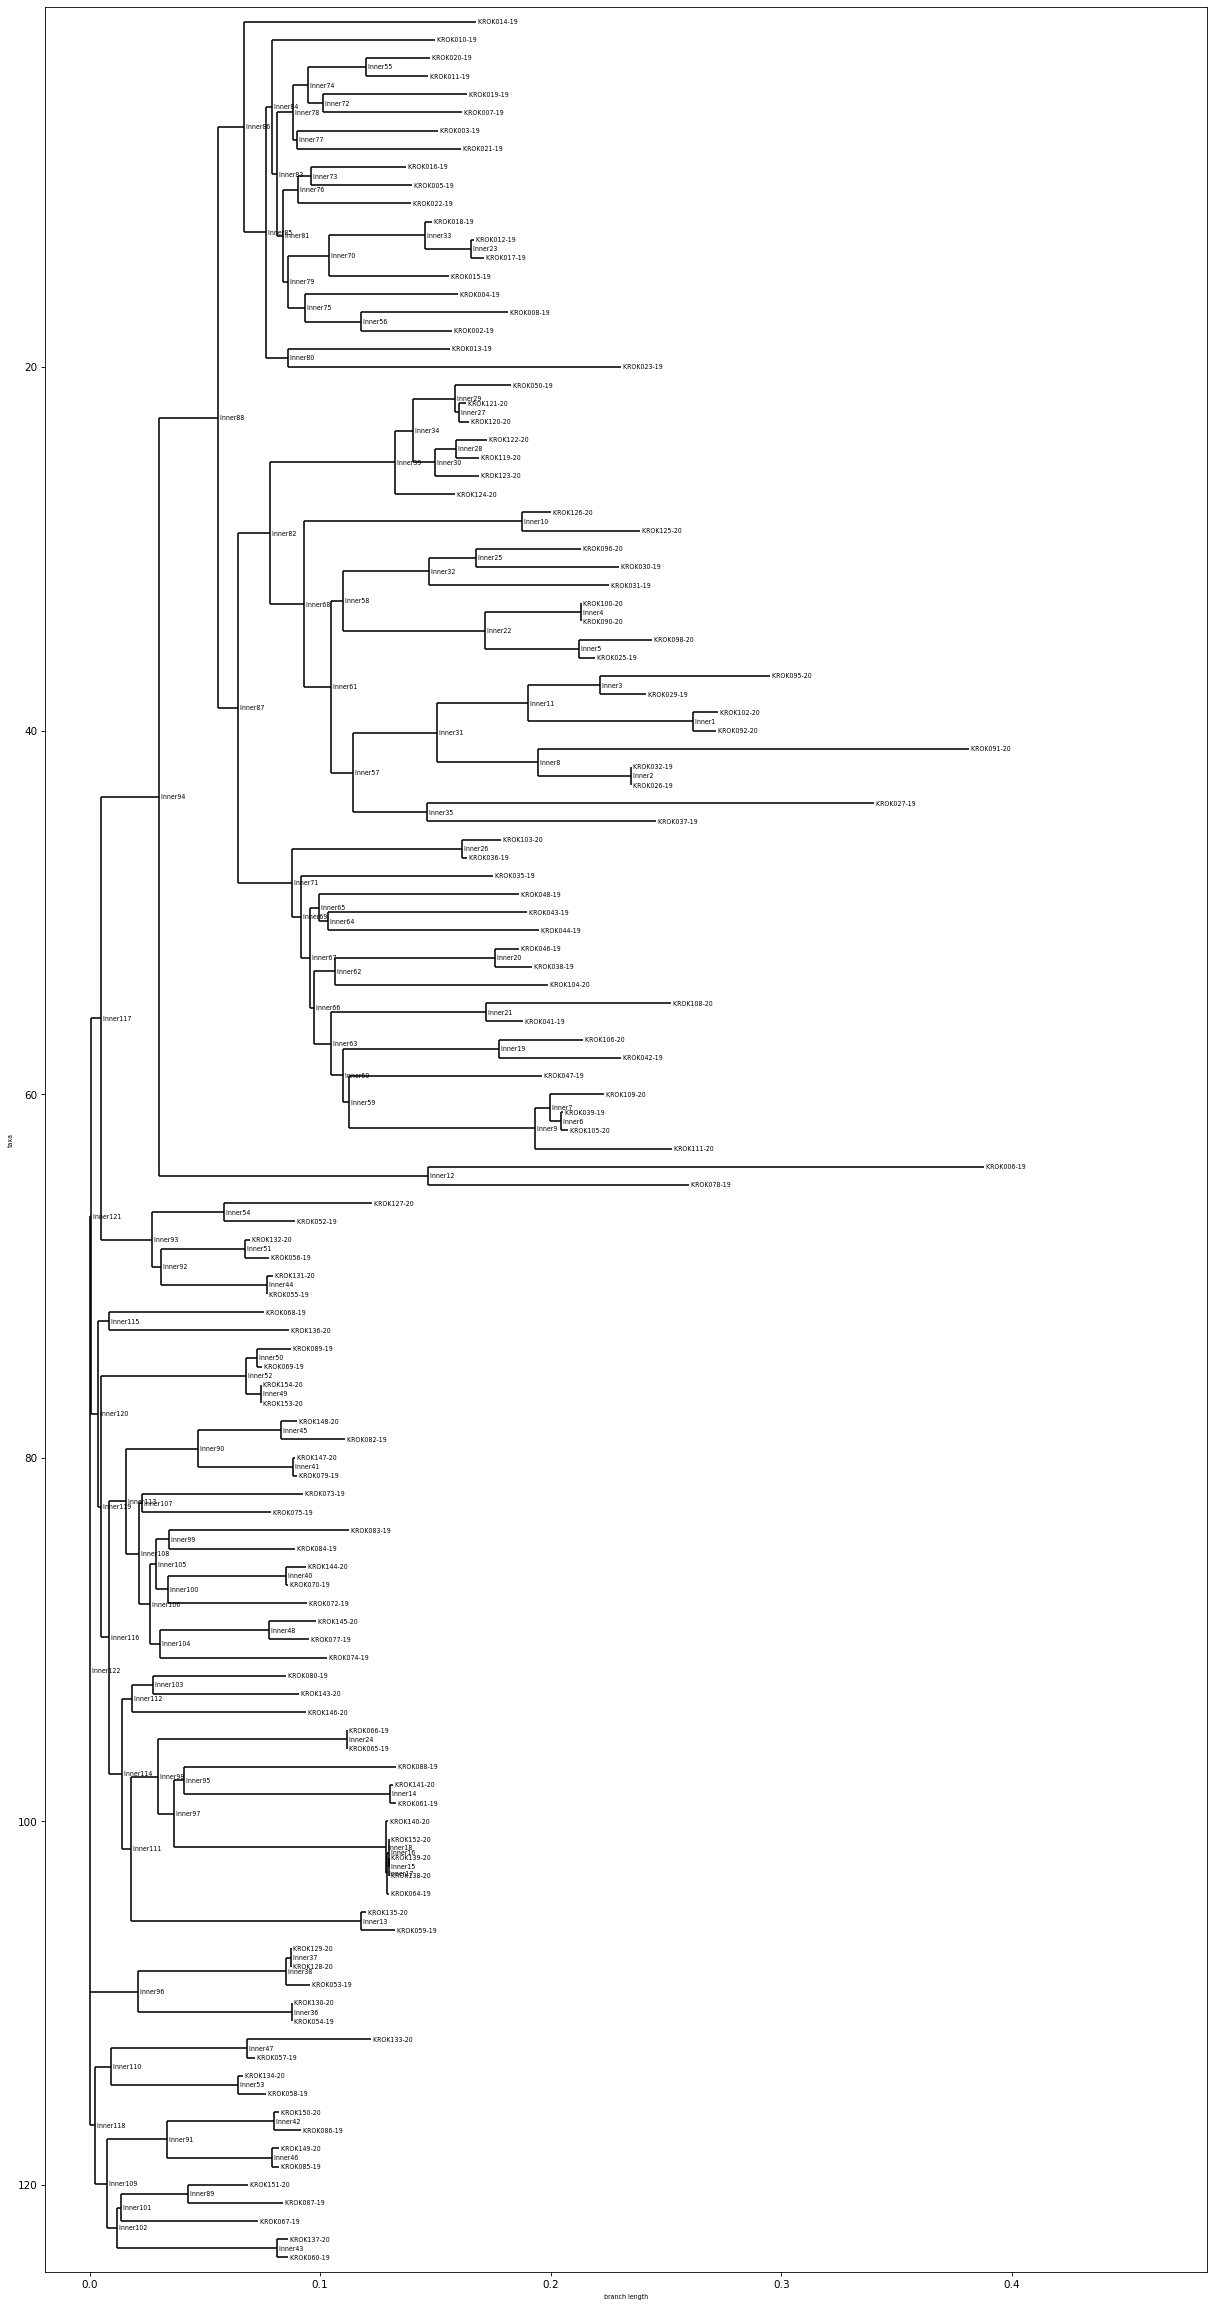

In [11]:
fig = plt.figure(figsize=(20, 40), dpi=75) # create figure & set the size 
matplotlib.rc('font', size=6)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#bug_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(bug_tree, axes=axes)
fig.savefig("bug_cladogram")

Convert() and write() as a "nexus" file

In [12]:
Phylo.convert("bug_tree.xml", "phyloxml", "bug_tree.nex", "nexus") 

1

In [13]:
Phylo.write(bug_tree, "bug_tree.nex", "nexus")

1

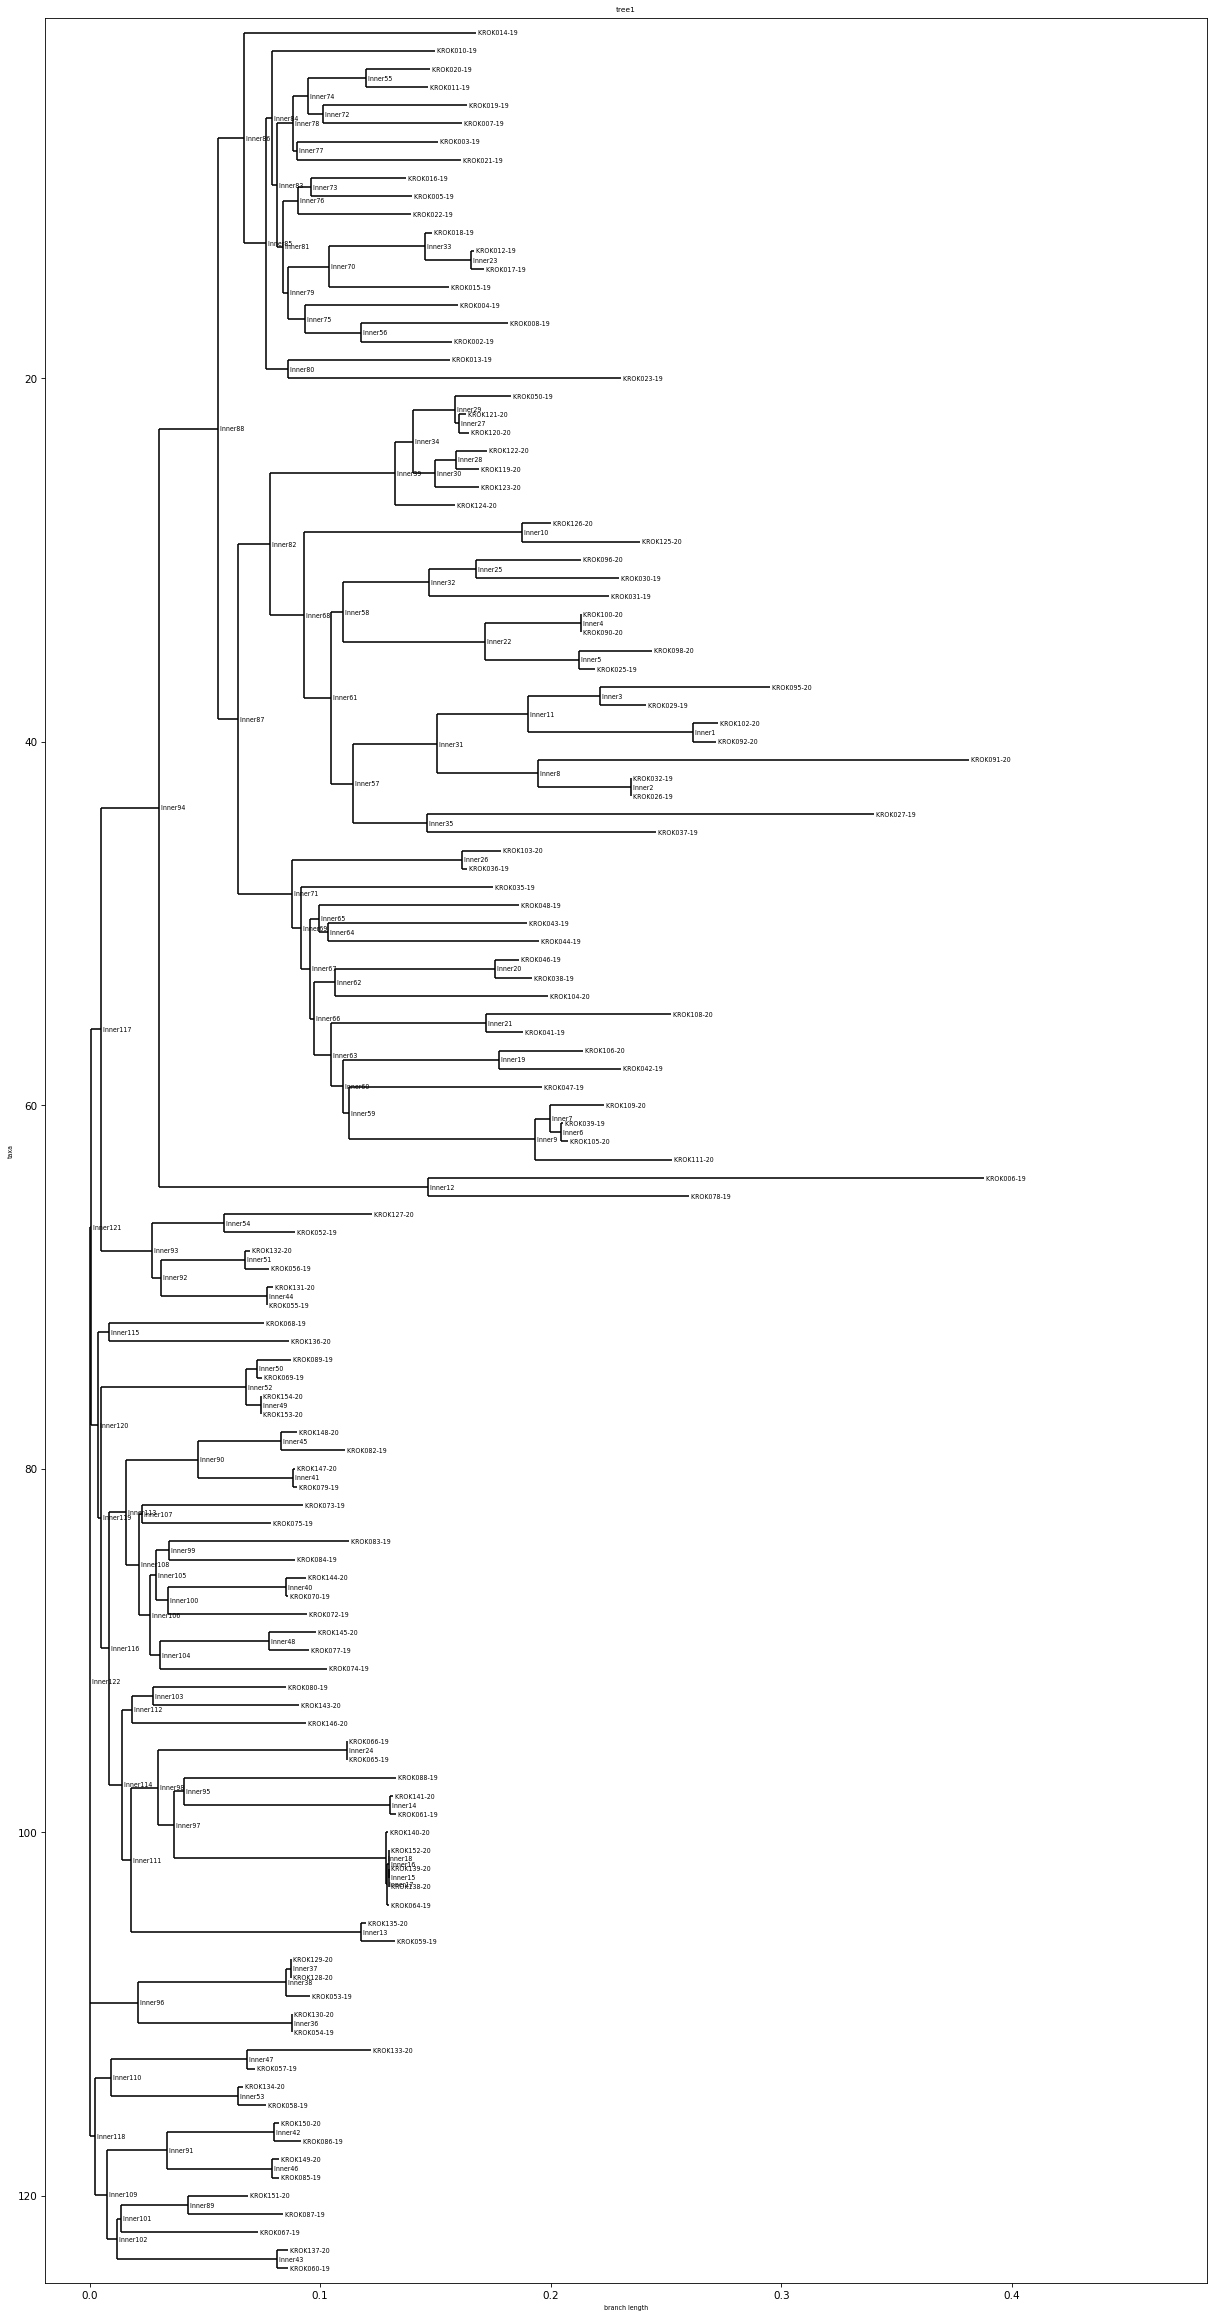

In [14]:
bug_nex = Phylo.read("bug_tree.nex", "nexus")

fig = plt.figure(figsize=(20, 40), dpi=75) # create figure & set the size 
matplotlib.rc('font', size=6)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#bug_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(bug_nex, axes=axes)
fig.savefig("bug2_cladogram")